In [10]:
#Hack to fix missing PROJ4 env var
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

In [12]:
#Import libraries
import numpy as np
import pandas as pd
import sqlite3
from datetime import timedelta
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from mpl_toolkits.basemap import Basemap
import folium
import folium.plugins
# from matplotlib import animation,rc
import io
import base64
import itertools
from subprocess import check_output

In [21]:
with sqlite3.connect('../data/database.sqlite') as con:
    countries = pd.read_sql_query("SELECT * from Country", con)
    matches = pd.read_sql_query("SELECT * from Match", con)
    leagues = pd.read_sql_query("SELECT * from League", con)
    teams = pd.read_sql_query("SELECT * from Team", con)
    player = pd.read_sql_query("SELECT * from Player",con)
    player_attributes = pd.read_sql_query("SELECT * from Player_Attributes",con)
    sequence = pd.read_sql_query("SELECT * from sqlite_sequence",con)
    team_attributes = pd.read_sql_query("SELECT * from Team_Attributes",con)
coords_cities = pd.read_excel("../data/latlong.xlsx")

In [ ]:
# countries.head()
# leagues.head()
# matches.head()
# teams.matches.head()
# player.head()
# player_attributes.head()
# sequence.head()
# team_attributes.head()

In [32]:
countries_leagues = countries.merge(leagues,left_on="id",right_on="id",how="outer")
countries_leagues = countries_leagues.drop("id",axis = 1)
countries_leagues = countries_leagues.rename(columns={'name_x':"country", 'name_y':"league"})

matches_new = matches[['id', 'country_id', 'league_id', 'season', 'stage', 'date',
                   'match_api_id', 'home_team_api_id', 'away_team_api_id',
                    'home_team_goal', 'away_team_goal']]

matches_new = matches_new.drop("id",axis=1)

data = matches_new.merge(countries_leagues,left_on="country_id",right_on="country_id",how="outer")

data.nunique()

country_id             11
league_id              11
season                  8
stage                  38
date                 1694
match_api_id        25979
home_team_api_id      299
away_team_api_id      299
home_team_goal         11
away_team_goal         10
country                11
league                 11
dtype: int64

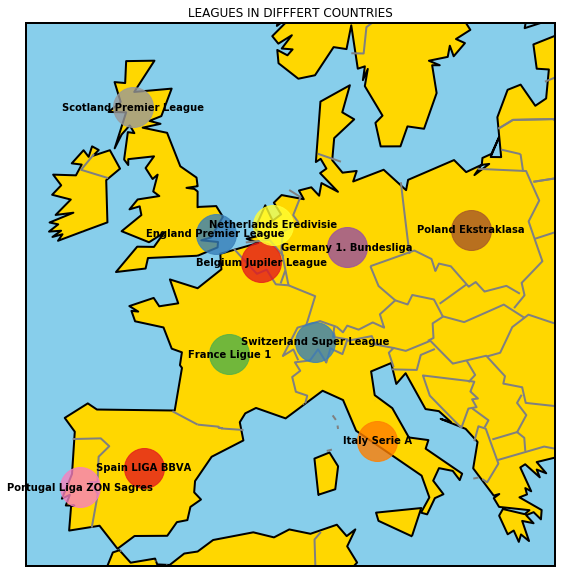

In [35]:
country_info  = countries_leagues.merge(coords_cities,left_on="country",right_on="name",how="left")
country_info  = country_info.drop(["country_id","country_y","name"],axis = 1)
m =Basemap(projection="merc",llcrnrlat=35,urcrnrlat=60,llcrnrlon=-12,urcrnrlon=25,lat_ts=20,lat_0=True,lon_0=True)

plt.figure(figsize=(15,10))

m.drawmapboundary(fill_color="skyblue",color="k",linewidth=2)
m.drawcoastlines(linewidth=2)
m.drawcountries(linewidth=2,color="grey")
m.fillcontinents(color="gold",alpha=1,lake_color="b")

leag = list(country_info["league"].unique())
c    = sns.color_palette("Set1",11)
lat = list(country_info[country_info["league"] == leag].latitude)
lon = list(country_info[country_info["league"] == leag].longitude)
x,y  = m(lon,lat) 

def function(leag,c):
    lat = list(country_info[country_info["league"] == leag].latitude)
    lon = list(country_info[country_info["league"] == leag].longitude)
    x,y = m(lon,lat)
    m.plot(x,y,"go",markersize=40,color=j,alpha=.8,linewidth=20)
    
for i,j in zip(leag,c):
    function(i,j)
        
for i,j,k in itertools.zip_longest(x,y,country_info["league"]):
    plt.text(i,j,k,fontsize =10,color="k",horizontalalignment='center',verticalalignment='center',weight="bold")
plt.title("LEAGUES IN DIFFFERT COUNTRIES")
plt.show()